In [1]:
from pdf2image import convert_from_path

In [2]:
import cv2

In [3]:
pages=convert_from_path("scan0009.pdf",500,poppler_path=r"C:\Users\Tushar\anaconda3\Library\bin\poppler-0.68.0_x86\poppler-0.68.0\bin")

In [4]:
#The following code is used to convert the pdf file into png format.
count=1
for page in pages:
    file_name= "page" + str(count) + ".png"
    page.save(file_name, "PNG")
    count+=1
# All the images from the pdf is saved into the directory

In [5]:
img=cv2.imread('page1.png')

In [6]:
cv2.imshow("Bank Document", img)
cv2.waitKey(0)

-1

# The above image will pop up on the window when you run it on your system
## The Above Image is quite big for a common window, Therefore we will reduce the dimension of the image as much so that we can see the image properly
#### Note We have to take care while reducing the size because I noticed too much reducing or increasing the size of the image leads to poorer results. Not sure but maybe that's related to pixels.

In [7]:
scale_percent=0.5
width=int(img.shape[1]*scale_percent)
height=int(img.shape[0]*scale_percent)
dimension=(width,height)
resized=cv2.resize(img,dimension,interpolation=cv2.INTER_AREA)

In [8]:
cv2.imshow("Bank Document", resized)
cv2.waitKey(0)

-1

In [9]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
#The above code is used for setting up the path of pytesseract as the path is different from my system environment

The above is a Color image of the form BGR(Since openCV reads an image in BGR) It consists of an extra bit which increases its complexity

In [10]:
import numpy as np
np.array(resized).shape

(2927, 2125, 3)

In [11]:
#therefore we will convert the image into Grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#Above code is used for converting the RGB image into grayscaling

In [12]:
np.array(gray).shape

(2927, 2125)

In [13]:
blur = cv2.GaussianBlur(gray, (5,5), 3)
#Bluring is used to reduce the noise error in the image or for smoothing putposes
#Other types of bluring techniques are averaging,median,bilateral
#others performed poorer than gaussian filtering. 

In [14]:
edges = cv2.Canny(gray,100,100)
#As the name suggests it's used for detecting edges in the image

In [15]:
thresh =cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)
#Thresholding is a technique which is used to convert pixels of an image based on a threshold value
#Adaptive thresholding, image has different threshold value for different portion.


In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
#Kernel is basically a matrix which is used for blurring ,thresholding etc. We didnot specified the kernel above because they have their defined kernel which are mentioned in the paranthesis.
dilate = cv2.dilate(gray,kernel, iterations=1)
#Dilate adds pixels to the boundary of an image, Therefore some incomplete texts are completed

opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
#opening is a process where erosion is followed by dilation

closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
#closing is reverse of opening where dilation is followed by erosion

In [17]:
images = {'gray': gray,
          'canny' : edges,
           'blur' : blur, 
          'adaptive thresh': thresh, 
          'opening': opening, 
          'dilate': dilate}
#Defining a dictionary

In [18]:
list(images.keys())

['gray', 'canny', 'blur', 'adaptive thresh', 'opening', 'dilate']

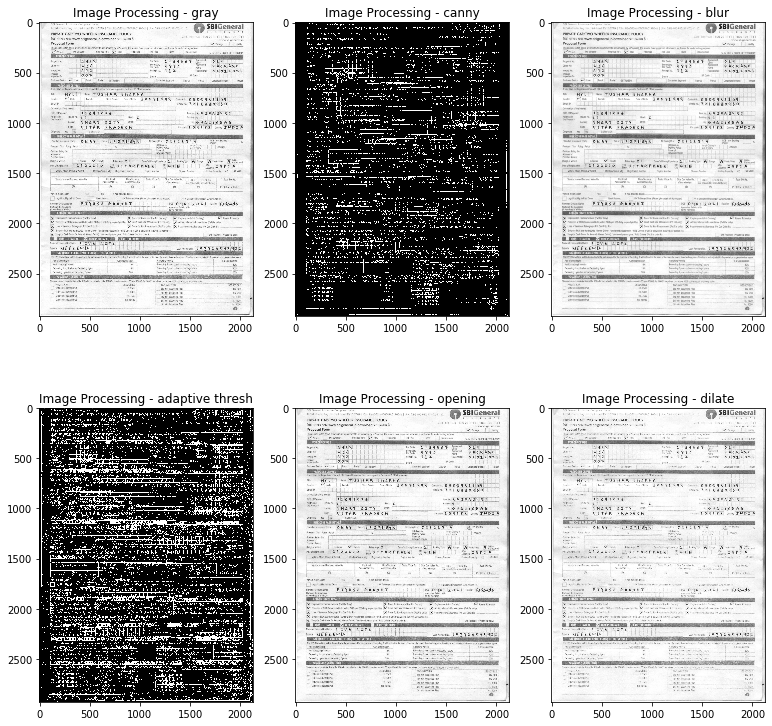

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13,13))
#This function is used to set the size of the image
ax = []

rows = 2
columns = 3
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) ) #This function is used to add an axis to the image and input another subplot i.e image
    ax[-1].set_title('Image Processing - ' + keys[i]) 
    plt.imshow(images[keys[i]],cmap='gray')

## By default Tesseract takes English language as an input but we can also use for other languages given their file is present in the tesseract folder.
#### Note I tried using Hindi and english both but it yielded poorer results
## OEM stands for OCR engine mode and here we have 2  engines i.e Legacy engine and Neural nets LSTM engine. We can use them in 4 ways. 
#### 0    Legacy engine only.
#### 1    Neural nets LSTM engine only.
#### 2    Legacy + LSTM engines.
#### 3    Default, based on what is available
## Here I have used the last one as I don't have engines Legacy and LSTM did not performed as good as 4th option. 
## PSM stands for Page Segmentation mode and here we have 14 options
### Here I have used 6 Assume a single uniform block of text.
#### NOTE I was confused between choosing between PSM 6 and PSM 3 which is 
#### Fully automatic page segmentation, but no Orientation and script detection Therefore I performed the latter also and had gave you the choice of choosing the better one
##### You can play around with the tesseract on the basis of above parameters

In [20]:
custom_config = r'--oem 3 --psm 6'
print("TESSERACT OUTPUT FOR THE GIVEN INPUT")
print(" ")
print(pytesseract.image_to_string(dilate, config=custom_config))

TESSERACT OUTPUT FOR THE GIVEN INPUT
 
| SBI Genera! Insurance Company Limited .
IRDAI of Reg. No. 144 dated 15/12/2009 | CIN: Ué6000MH2009PLC190546 | UIN: SBG-MO-P12-57-VO Fm be $BilGeneral
. LN S 4m ATH CE
PRIVATE CAR/TWO WHEELER INSURANCE POLICY bene : s 110051 Ses ee
: : : Cail (Tc ee) 1800 22 111 ] )
feel Ueda WIA www.sbigeneral.in/download WX Sued & | www. sbigeneral.in
Proposal Form WV Package Liability
The queries siated below are minimum requirement to be furnished by a Proposer. The insurer may seek more information as desired for underwriting purpose la 75 eee
\Y Pvt Car fs. Two Wheeler Proposal for uw New ead Renewal Roll Over i Used Endorsement To be filled in BLOCK LETTERS ONLY
ince me gy Rm ma i at a ie aes aed cance a eg ar or ae t =. Agreement [ae o? So ae
Proposal No yee | coe tt Pee | ee Ti2314'5' 61+ Code ib la .
| | econdary Agreement
isa —— ae 3& : tt EF ea oo nae oat -. RM Code 4 3 a 3 " Name ; Pp A < K AGE =
Inward No 632 | ReceiptNo. 4 +2 Receipt Dae 16 Dio Zon

In [21]:
print("TESSERACT OUTPUT FOR THE GIVEN INPUT")
print(" ")
print(pytesseract.image_to_string(closing, config=custom_config))

TESSERACT OUTPUT FOR THE GIVEN INPUT
 
| S81 Genera! Insurance Company Limited . SBIG j
IRDAI of fnciio Reg. No. 144 dated 15/12/2009 | CIN: U6aQ00/MH2009PLC190546 | UIN: SBG-MO-P12.57-V02-11-17 enera
1NS URANCE
PRIVATE CAR/TWO WHEELER INSURANCE POLICY anieee iSanes 11701 Mies
5 ; : R Coll {Toll Free} 1800 22 1111 | 1 2
feet bea1a W9A www.sbigeneral.in/download W Sueee z | www.sbigeneral.in
Proposal Form WM Package |_| Liability
The queries stated below are minimum requirement to be furnished by a Proposer. The insurer may seek more information as desired for underwriting purpose
7 Put Car |___ Two Wheeler Proposalfor: N~ New | — Renewal — | Roll Over _, Used Endorsement To be filled in BLOCK LETTERS ONLY
FOR OFFICE USE
a ara GATS Ee Tee. Agreement pos romncine 7 tainmsnarcmncincsonnces.o
ProposaNo: | | | ISISSI ter —— T3456 ce JE, aaa |
| i ee ee ! | Secondary | Agreement A
Quote No. ote aa 236. mol SO ES er a Ee GMC WO PSS 43 43. iil Name PACK AGE =
Inward No, j 632 | | | | ReceiptNo

In [22]:
print("TESSERACT OUTPUT FOR THE GIVEN INPUT")
print(" ")
print(pytesseract.image_to_string(opening, config=custom_config))

TESSERACT OUTPUT FOR THE GIVEN INPUT
 
' SBI Genera! Insurance Company Limited . SBIG j
IRDAI of {ncio Reg. No. 144 dated 15/12/2009. | CIN: U6e000MH2009PLC190546 | UIN: SBG-MO-P12-57-V02-1 1-12 ‘> enera
. in S$ U R ACN CE
PRIVATE CAR/TWO WHEELER INSURANCE POLICY er ere TS
a ‘ : Coll (ioll Free 44 |
feel Weald W9A www.sbigeneral.in/download W Saeed z | www.sbigeneral.in
Proposal Form W Package | | Liability
The queries stated below are minimum requirement to be furnished by a Proposer. The insurer may seek more intormation as desired for underwriting purpose
V7 PvtCar | | Two Wheeler Proposalfor: NX“ New | | Renewal | Roll Over |_| Used |__| Endorsement To be filled in BLOCK LETTERS ONLY
Sew. fo! RR Rice Sei eee aia age Ziq Agreement fata -| 1 1 YY
ProposaNo. = | | | ISIMSiG | | tt te ttt = — 12345 6 F cote LE. Sa ee
] = Va fe a Pa Tt econdary | Agreement AG
uote Ny: ESS. i BESERSESSEeel a RM Code 4 = 3% 43 = Name PACKAGE —
Inward No. tT] 632 | [J Receipt No. [414 2 Receipt Date [6 2/0

In [23]:
from pytesseract import Output
d = pytesseract.image_to_data(dilate, output_type=Output.DICT)
d.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

## You can also see the boxes which the tesseract is considering from printing by running the following code 

In [24]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(dilate, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', dilate)
cv2.waitKey(0)

-1